In [101]:
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.offline.init_notebook_mode()
%matplotlib inline

In [102]:
bb = pd.read_csv('assets/billboard.csv')



# Risks & Assumptions: 

Billboard Top 100 data in 2000 is based on a combination of radio airplay and sales*
    
    *Sales of tracks are calculated using CD sales and not independant tracks in 2000

# Hypothesis: 
       
## The genre Rap takes the longest time to peak.

Does genre have an influence on time it takes to peak?



## Cleaning the Data

### Replace Nulls

In [103]:
def replace_nulls(value):
    if value == '*':
        return np.nan
    else:
        return value

bb = bb.applymap(replace_nulls)

bb.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert to Numeric (Float)

In [104]:
bb.iloc[:,8:] = bb.iloc[:,8:].apply(pd.to_numeric)

In [105]:
bb.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

### Convert Time to Seconds (Length of Time)

In [106]:
def c_time(x):
    min = int(x.split(',')[0])
    sec = int(x.split(',')[1])
    time = (min * 60) + sec
    return time

bb['time'] = bb['time'].apply(c_time)

### Clean Genre

In [107]:
bb['genre'].unique()

array(['Rock', "Rock'n'roll", 'Latin', 'Country', 'Rap', 'Pop',
       'Electronica', 'Jazz', 'R&B', 'Reggae', 'Gospel', 'R & B'], dtype=object)

In [108]:
def c_genre(x):
    if x == 'R & B':
        return 'R&B'
    elif x == "Rock'n'roll":
        return 'Rock'
    else:
        x
    return x

bb['genre'] = bb['genre'].apply(c_genre)

### Sort by Artist Name

In [109]:
bb = bb.sort_values(by = 'artist.inverted')

bb.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,"February 26, 2000","March 11, 2000",87,82.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,195,R&B,"September 2, 2000","September 9, 2000",91,87.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2000,3 Doors Down,Kryptonite,233,Rock,"April 8, 2000","November 11, 2000",81,70.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,2000,3 Doors Down,Loser,264,Rock,"October 21, 2000","December 2, 2000",76,76.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,2000,504 Boyz,Wobble Wobble,215,Rap,"April 15, 2000","May 6, 2000",57,34.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert Date Entered & Date Peaked to Date/ Time 

In [110]:
bb[['date.entered','date.peaked']] = bb[['date.entered','date.peaked']].apply(pd.to_datetime)

bb.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,87,82.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,195,R&B,2000-09-02,2000-09-09,91,87.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2000,3 Doors Down,Kryptonite,233,Rock,2000-04-08,2000-11-11,81,70.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,2000,3 Doors Down,Loser,264,Rock,2000-10-21,2000-12-02,76,76.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,2000,504 Boyz,Wobble Wobble,215,Rap,2000-04-15,2000-05-06,57,34.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Reset Index

In [111]:
bb = bb.reset_index(drop=True)

bb.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,87,82.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,195,R&B,2000-09-02,2000-09-09,91,87.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,233,Rock,2000-04-08,2000-11-11,81,70.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,264,Rock,2000-10-21,2000-12-02,76,76.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,215,Rap,2000-04-15,2000-05-06,57,34.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Aggregate Functions by Genre and Time (Length)

Mean, Median, Mode, Standard Deviation, Variance, Length

In [112]:
pd.pivot_table(bb, index = 'genre', values = 'time', aggfunc = [np.mean, np.median, stats.mode, np.std, np.var, len]).T


genre,Country,Electronica,Gospel,Jazz,Latin,Pop,R&B,Rap,Reggae,Rock
mean,226.689,270.75,330,470,254.444,225,242.957,243.397,257,247.547
median,223.5,232,330,470,239,224,235,240,257,244
mode,"([234], [3])","([209], [1])","([330], [1])","([470], [1])","([242], [2])","([199], [1])","([231], [2])","([230], [3])","([257], [1])","([232], [5])"
std,38.3788,93.6923,NaN,NaN,78.5973,15.2315,48.2668,29.7804,NaN,37.603
var,1472.93,8778.25,NaN,NaN,6177.53,232,2329.68,886.875,NaN,1413.98
len,74,4,1,1,9,9,23,58,1,137


In [113]:
bb.describe()


,year,time,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,242.425868,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,42.401618,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,156.000000,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,219.000000,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,236.000000,81.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,257.000000,91.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,470.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rank and Longevity of Top 100 Songs

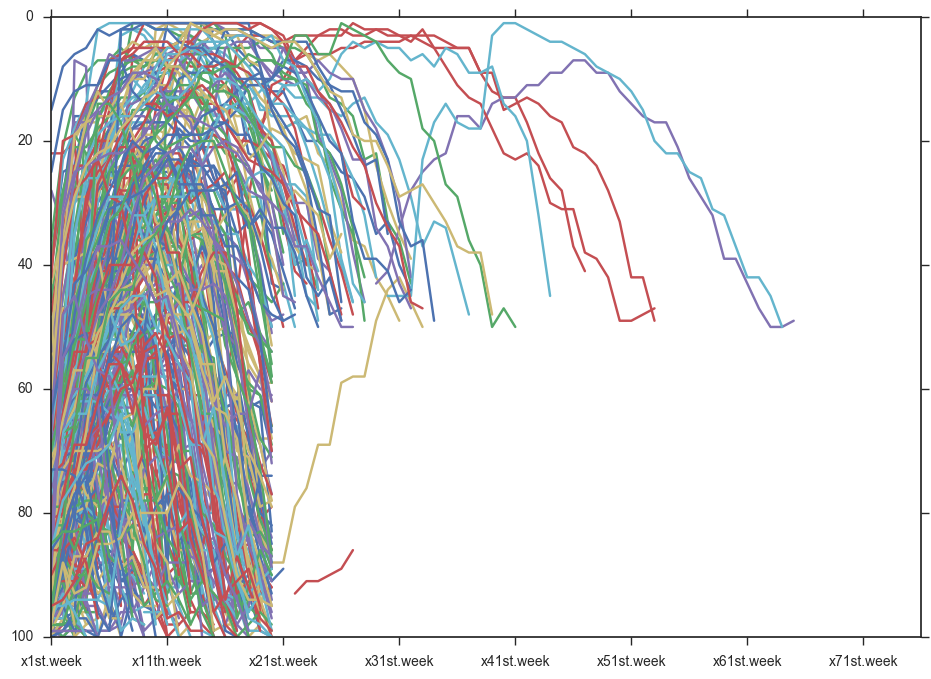

In [114]:
bb_t = bb.iloc[:,7:].T.plot(figsize=(10,8), legend = False);

bb_t.set_ylim(0,100)
bb_t.invert_yaxis()


In [115]:
bb.columns

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x

### Days for Songs to Peak on the Billboard

In [116]:
bb['days_to_peak'] = bb['date.peaked']- bb['date.entered']

In [117]:
bb.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,days_to_peak
0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,87,82.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14 days
1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,195,R&B,2000-09-02,2000-09-09,91,87.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7 days
2,2000,3 Doors Down,Kryptonite,233,Rock,2000-04-08,2000-11-11,81,70.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217 days
3,2000,3 Doors Down,Loser,264,Rock,2000-10-21,2000-12-02,76,76.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42 days
4,2000,504 Boyz,Wobble Wobble,215,Rap,2000-04-15,2000-05-06,57,34.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21 days


### Clean Days_To_Peak 

(Float)

In [118]:
def rm (x):
    dc = str(x).split(' ')[0]
    return float(dc)

bb['days_to_peak'] = bb['days_to_peak'].apply(rm)


In [119]:
bb

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,days_to_peak
0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,87,82.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,195,R&B,2000-09-02,2000-09-09,91,87.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2,2000,3 Doors Down,Kryptonite,233,Rock,2000-04-08,2000-11-11,81,70.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0
3,2000,3 Doors Down,Loser,264,Rock,2000-10-21,2000-12-02,76,76.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
4,2000,504 Boyz,Wobble Wobble,215,Rap,2000-04-15,2000-05-06,57,34.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
5,2000,98�,Give Me Just One Night (Una Noche),204,Rock,2000-08-19,2000-09-30,51,39.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
6,2000,A*Teens,Dancing Queen,224,Pop,2000-07-08,2000-07-29,97,97.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
7,2000,Aaliyah,Try Again,243,Rock,2000-03-18,2000-06-17,59,53.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0
8,2000,Aaliyah,I Don't Wanna,255,Rock,2000-01-29,2000-03-04,84,62.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0
9,2000,"Adams, Yolanda",Open My Heart,330,Gospel,2000-08-26,2000-10-21,76,76.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0


### Average Days to Peak by Genre

In [120]:
bb_gd = pd.pivot_table(bb, index = 'genre', values = 'days_to_peak').to_frame()

bb_gd

,days_to_peak
genre,
Country,58.364865
Electronica,61.250000
Gospel,56.000000
Jazz,14.000000
Latin,64.555556
Pop,47.444444
R&B,28.608696
Rap,41.396552
Reggae,42.000000


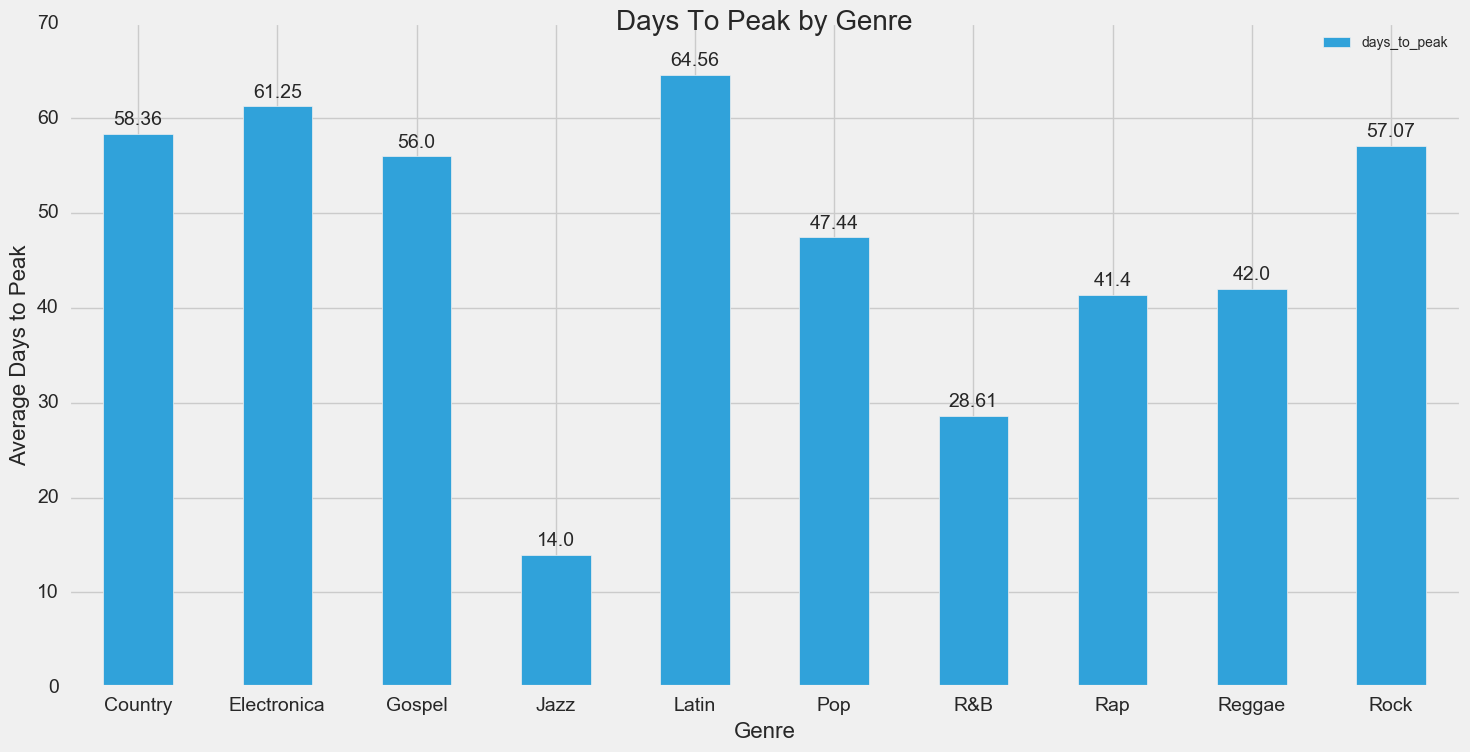

In [121]:
xlabels = ['Country','Electronica','Gospel','Jazz','Latin','Pop', 'R&B','Rap','Reggae','Rock']

plt.style.use('fivethirtyeight')

barplt = bb_gd.plot(kind='bar', figsize=(16,8), fontsize=14) 
barplt.set_title('Days To Peak by Genre', y=.98, fontsize=20)
barplt.set_ylabel('Average Days to Peak', fontsize=16)
barplt.set_xlabel('Genre', fontsize=16)
barplt.set_xticklabels(xlabels, rotation=360)

for p in barplt.patches: 
    barplt.annotate(np.round(p.get_height(),decimals=2),\
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points');



### Statistical Significance of Rap vs All Other Genre - Time to Peak

In [122]:
g_dtp = ['genre', 'days_to_peak']

rap = bb[g_dtp]
genre_rap = ["Rap"]
rap = rap[rap['genre'].isin(genre_rap)].reset_index(drop=True)

rap.head()

,genre,days_to_peak
0,Rap,14.0
1,Rap,21.0
2,Rap,14.0
3,Rap,42.0
4,Rap,35.0


NULL HYPOTHESIS - There is no difference between Rap and other genres in days to peak

ALTERNATIVE HYPOTHESIS - The genre Rap is takes the longest amount of days to peak compared to other genres

### P- Value & T- Test

In [123]:
stats.ttest_ind(rap['days_to_peak'], bb['days_to_peak'])

Ttest_indResult(statistic=-1.9036278396376376, pvalue=0.057728088038751131)

Since the p-value is higher than the significance level, alpha (.05), the alternative hypothesis is rejected and the null hypothesis is true.

** It is hard to exactly calculate significance level though because it is only very slightly higher than the .05 (difference of .007)


### Relationship of Days to Peak vs Songs in a Genre (Top 100)

In [124]:
bb_dl = pd.pivot_table(bb, index = 'genre', values = 'days_to_peak', aggfunc = [np.mean,len])

bb_dl['genre'] = bb_dl.index
bb_dl

,mean,len,genre
genre,,,
Country,58.364865,74.0,Country
Electronica,61.250000,4.0,Electronica
Gospel,56.000000,1.0,Gospel
Jazz,14.000000,1.0,Jazz
Latin,64.555556,9.0,Latin
Pop,47.444444,9.0,Pop
R&B,28.608696,23.0,R&B
Rap,41.396552,58.0,Rap
Reggae,42.000000,1.0,Reggae


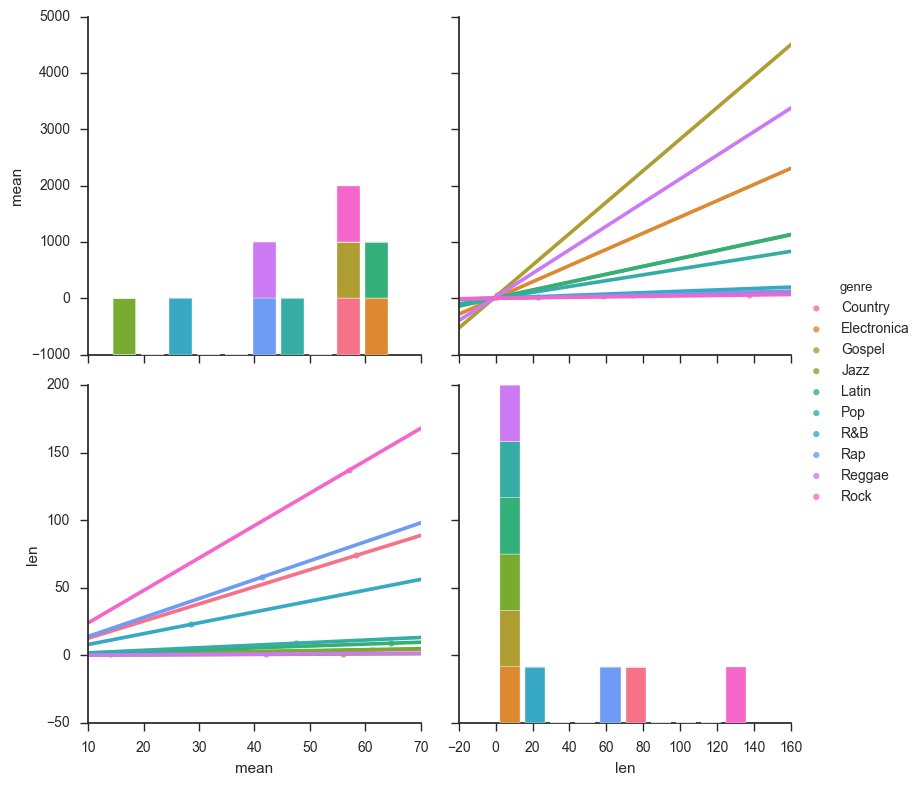

In [125]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(bb_dl, kind="reg", size=4, hue= "genre");

## Proportion of Time to Peak and Time on Chart

In [64]:
bb.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,days_to_peak
0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,87,82.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,195,R&B,2000-09-02,2000-09-09,91,87.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2,2000,3 Doors Down,Kryptonite,233,Rock,2000-04-08,2000-11-11,81,70.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0
3,2000,3 Doors Down,Loser,264,Rock,2000-10-21,2000-12-02,76,76.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
4,2000,504 Boyz,Wobble Wobble,215,Rap,2000-04-15,2000-05-06,57,34.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


### Volume of Tracks in Top 100 Per Week

In [83]:
bb_c = bb.count()[7:].to_frame()

bb_c

,0
x1st.week,317
x2nd.week,312
x3rd.week,307
x4th.week,300
x5th.week,292
x6th.week,280
x7th.week,269
x8th.week,260
x9th.week,253
x10th.week,244


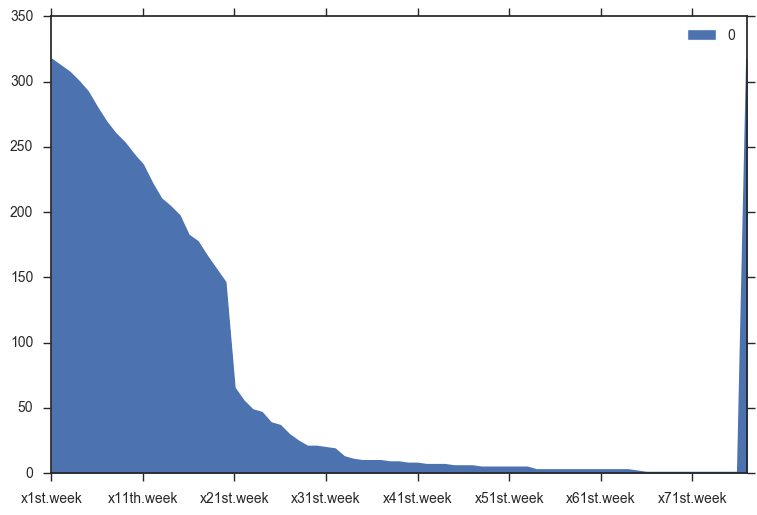

In [163]:
bb_c.plot(kind = 'area')

### Proportion of Weeks on Charts compared to Weeks to Peak

In [152]:
bb_new = bb
bb_new['weeks_to_peak'] = bb_new['days_to_peak']/7
bb_new['weeks_on_charts'] = bb.iloc[:,7:82].count(axis = 1).apply(lambda x: float(x))

bb_new.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,days_to_peak,weeks_on_charts,weeks_to_peak
0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),262,Rap,2000-02-26,2000-03-11,87,82.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,7.0,2.0
1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,195,R&B,2000-09-02,2000-09-09,91,87.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,1.0
2,2000,3 Doors Down,Kryptonite,233,Rock,2000-04-08,2000-11-11,81,70.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0,53.0,31.0
3,2000,3 Doors Down,Loser,264,Rock,2000-10-21,2000-12-02,76,76.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,20.0,6.0
4,2000,504 Boyz,Wobble Wobble,215,Rap,2000-04-15,2000-05-06,57,34.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,18.0,3.0


In [153]:
bb_p = pd.pivot_table(bb_new, index = 'genre', values = ['weeks_to_peak','weeks_on_charts'], aggfunc = np.mean)
bb_p

,weeks_on_charts,weeks_to_peak
genre,,
Country,16.216216,8.337838
Electronica,18.000000,8.750000
Gospel,20.000000,8.000000
Jazz,5.000000,2.000000
Latin,19.222222,9.222222
Pop,15.222222,6.777778
R&B,11.347826,4.086957
Rap,14.431034,5.913793
Reggae,15.000000,6.000000


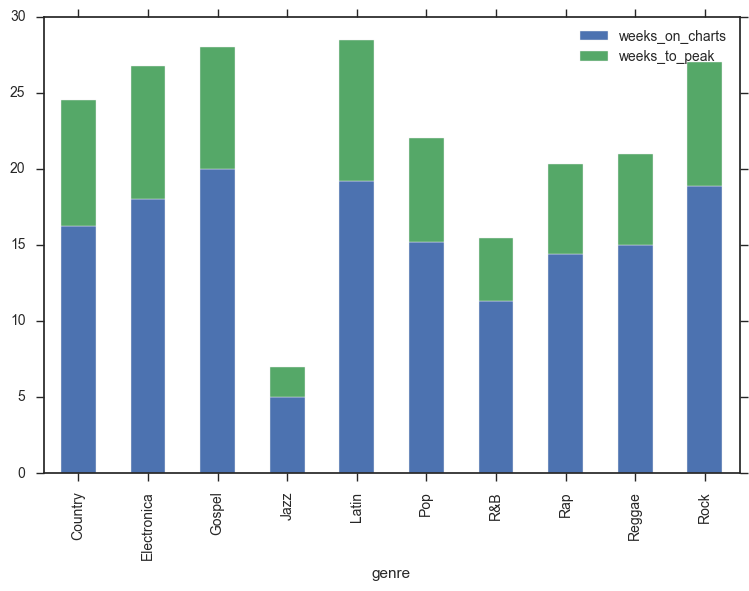

In [156]:
bb_p.plot(kind= 'bar',stacked = True)

KeyError: 2

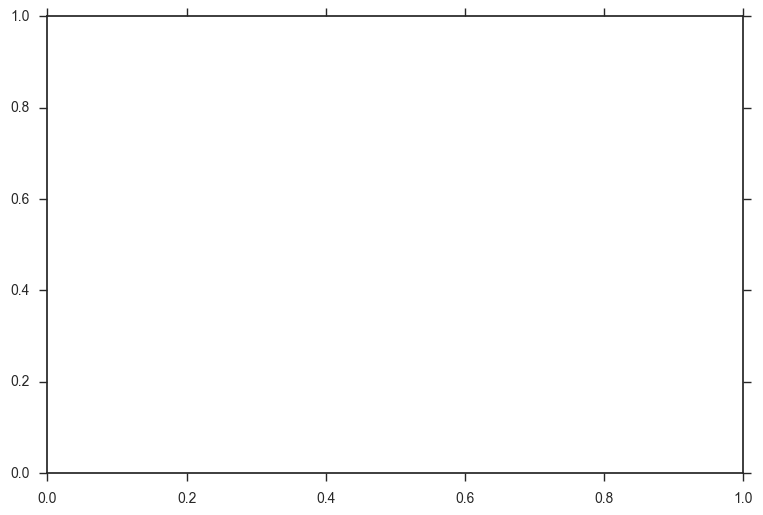

In [174]:
bb_p.plot(x='weeks_to_peak', y='weeks_on_charts', c= 'genre', kind='scatter', s= 250, figsize=(16,8))